In [30]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np

from collections import Counter

import pyspark.pandas as ps

import findspark
from pyspark.sql import SparkSession
findspark.init()
spark = SparkSession \
    .builder \
    .appName("classification_evaluation1") \
    .config('spark.sql.session.timeZone', 'Asia/Shanghai') \
    .master("local[*]") \ 
    .getOrCreate() 

In [2]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve, confusion_matrix

### Binary

In [102]:
# 创建虚拟二分类数据集
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, n_clusters_per_class=1, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练Logistic回归模型
model = LogisticRegression()
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

In [104]:
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred)
recall_score(y_test, y_pred)
f1_score(y_test, y_pred)

0.8858131487889273

In [72]:
# 计算伪阳性率（查资料确认）
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
false_positive_rate = fpr[1]
print("False Positive Rate:", false_positive_rate)

False Positive Rate: 0.0


In [79]:
# 计算ROC曲线下面积（AUC）（查资料确认）
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9551031294452347


In [80]:
# 计算PR曲线下面积（Area under PR）（查资料确认）
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
print("PR AUC Score:", pr_auc)

PR AUC Score: 0.9619883565578784


In [105]:
confusion_matrix(y_test, y_pred)

array([[139,  13],
       [ 20, 128]], dtype=int64)

In [96]:
# 计算PR曲线的数据点
precision, recall, t1 = precision_recall_curve(y_test, y_pred_prob)

# 计算ROC曲线的数据点
fpr, tpr, t2 = roc_curve(y_test, y_pred_prob)

# 计算KS曲线的数据点
ks_values = tpr - fpr

# 计算LIFT chart数据点
lift_data = np.column_stack((y_test, y_pred_prob))
lift_data = lift_data[lift_data[:, 1].argsort()[::-1]]
total_positives = np.sum(y_test)
lift_values = np.cumsum(lift_data[:, 0]) / (total_positives * np.arange(1, len(lift_data) + 1))

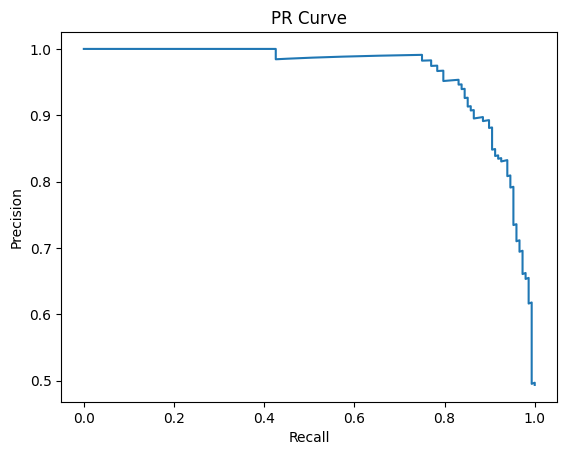

In [54]:
# 绘制PR曲线
plt.figure()
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')
plt.show()

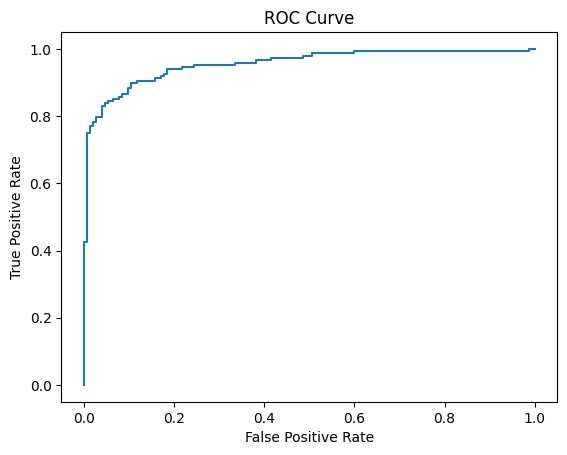

In [55]:
# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

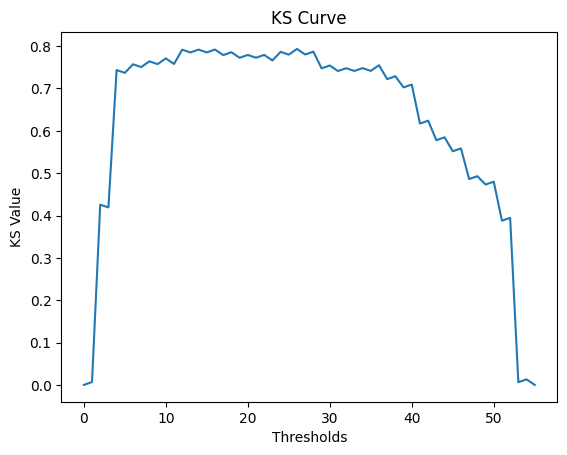

In [56]:
# 绘制KS曲线
plt.figure()
plt.plot(ks_values)
plt.xlabel('Thresholds')
plt.ylabel('KS Value')
plt.title('KS Curve')
plt.show()

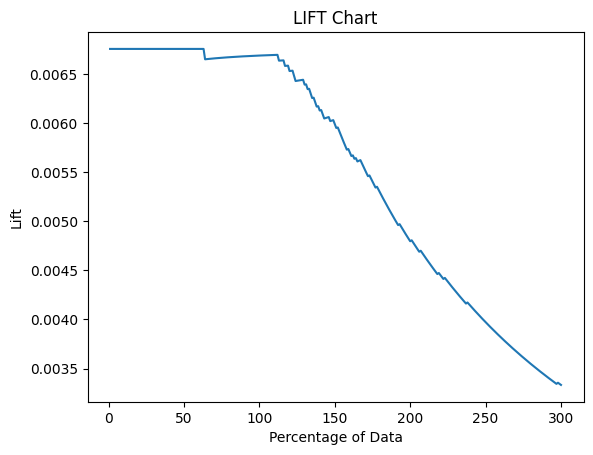

In [57]:
# 绘制LIFT chart
plt.figure()
plt.plot(np.arange(1, len(lift_values) + 1), lift_values)
plt.xlabel('Percentage of Data')
plt.ylabel('Lift')
plt.title('LIFT Chart')
plt.show()

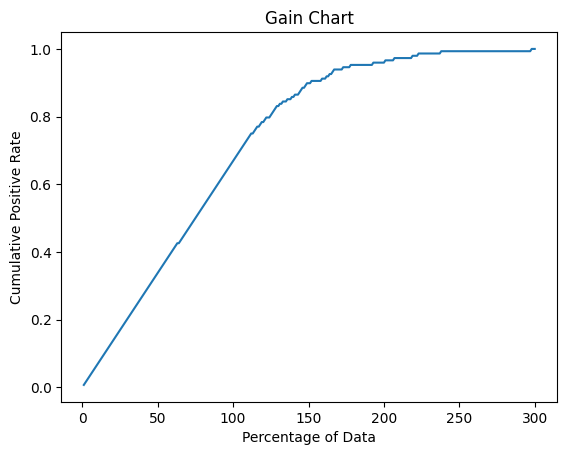

In [58]:
# 绘制Gain chart
plt.figure()
plt.plot(np.arange(1, len(lift_data) + 1), np.cumsum(lift_data[:, 0]) / total_positives)
plt.xlabel('Percentage of Data')
plt.ylabel('Cumulative Positive Rate')
plt.title('Gain Chart')
plt.show()

### Multi-class

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve

In [111]:
# 创建虚拟多分类数据集（使用Scikit-learn）
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_clusters_per_class=1, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [114]:
# 在Scikit-learn中拟合随机森林模型
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)
y_pred = model.predict(X_test)

In [136]:
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 计算精确率
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# 计算召回率
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# 计算F1分数
f1score = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1score)

# 计算ROC曲线下面积（AUC）
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8966666666666666
Precision: 0.8965428075231866
Recall: 0.8966666666666666
F1 Score: 0.8959054898538515
ROC AUC Score: 0.9803524452062783


In [137]:
confusion_matrix(y_test, y_pred)

array([[84,  7, 10],
       [10, 86,  1],
       [ 3,  0, 99]], dtype=int64)